# 비지도 학습

In [1]:
import mglearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 비지도 학습의 종류

비지도 변환: 차원 축소, 주성분 분석 등  
클러스터링

# 비지도 학습의 도전과제

평가가 힘들다  
&nbsp; 이유: 레이블이 없는 경우가 많기 때문에 모델이 잘 하고 있는지 알기 힘듦

### 비지도 학습의 활용

데이터 탐색: 데이터의 생김새 등을 파악하고자 할 때 (특히 시각화)  
데이터 전처리: 비지도 학습을 통해 데이터를 새롭게 표현 (스케일링)

# 전처리, 스케일링

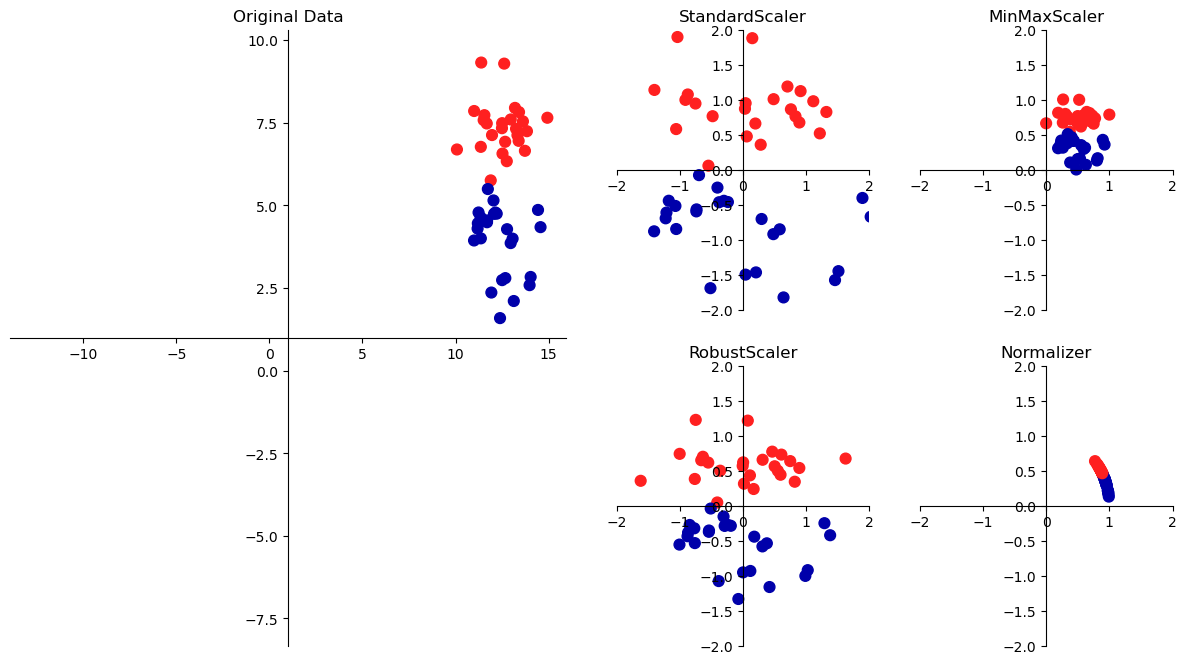

In [2]:
mglearn.plots.plot_scaling()

### 스케일링 방법

1. StandardScaler: 데이터를 표준정규분포에 맞춰 정규화  
2. RobustScaler: 데이터의 중간값, 사분위에 따라 변형 >>> 이상치에 덜 민감하게 반응  
3. MinMaxScaler: 최대값을 1, 최소값을 0으로 한 뒤, 데이터를 이 사이에 맞춰 변형  
4. Normalizer: 데이터의 유클리디안 거리가 1이 되도록 조정 >>> 각 데이터는 방향으로만 구분 가능

In [3]:
"""
    스케일링 예시
"""

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)

X_train.shape, X_test.shape

((426, 30), (143, 30))

In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train)

MinMaxScaler()

In [5]:
X_train_scaled = scaler.transform(X_train)

print(X_train_scaled.shape)
print(X_train.min(axis=0))
print(X_train.max(axis=0))
print(X_train_scaled.min(axis=0))
print(X_train_scaled.max(axis=0))

(426, 30)
[6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


#### 스케일링 시 주의사항

반드시 데이터 분할 전의, 원본 데이터로 스케일링할 것  
&nbsp; 만약 분할 후, 훈련셋에만 맞춰 스케일러를 만들면?
- 스케일러는 훈련셋의 최대, 최소값만 알고 있는 상태
- 이 스케일러를 테스트셋에 적용하면 테스트셋은 훈련셋의 값들을 기준으로 스케일링됨
- 이 경우, 제대로 스케일링되지 않을 수 있음  
&nbsp;>>> MinMaxScaler를 예로 들면, 훈련셋의 최대값보다 크거나 최소값보다 작은 값이 있을 수 있으므로 음수나 1보다 큰 값이 나올 수도 있다

In [6]:
print(scaler.transform(X_test).min(axis=0))
print(scaler.transform(X_test).max(axis=0))

[ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
[0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


#### QuantileTransformer: ~ RobustScaling

데이터를 n_samples에 걸쳐 균등하게 분포시키고, 0 ~ 1 사이로 압축

In [7]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import QuantileTransformer, StandardScaler, PowerTransformer

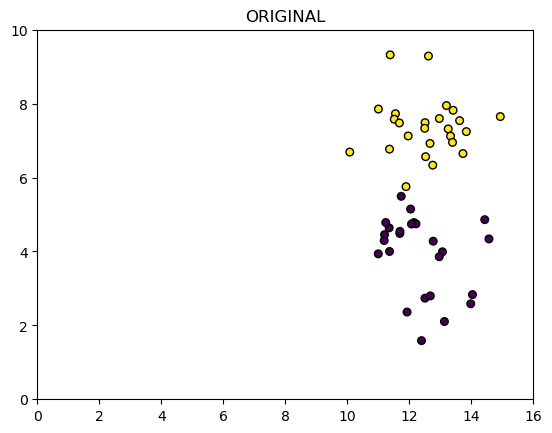

In [8]:
X, y = make_blobs(n_samples=50, centers=2, random_state=4, cluster_std=1)
X += 3

plt.scatter(X[ : , 0], X[ : , 1], c=y, s=30, edgecolors='k')
plt.axis([0, 16, 0, 10])
plt.title("ORIGINAL")

plt.show()

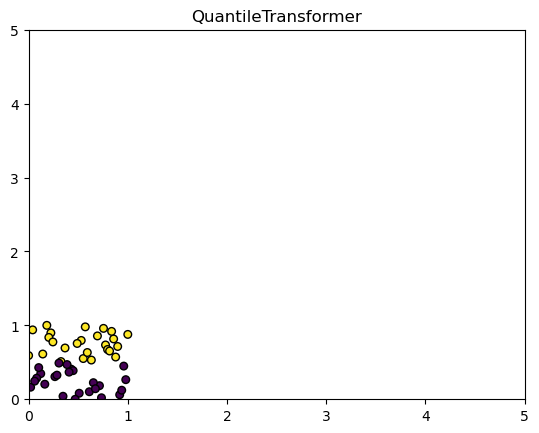

In [9]:
scaler = QuantileTransformer(n_quantiles=50)
X_trans = scaler.fit_transform(X)

plt.scatter(X_trans[ : , 0], X_trans[ : , 1], c=y, s=30, edgecolors='k')
plt.axis([0, 5, 0, 5])
plt.title(type(scaler).__name__)

plt.show()

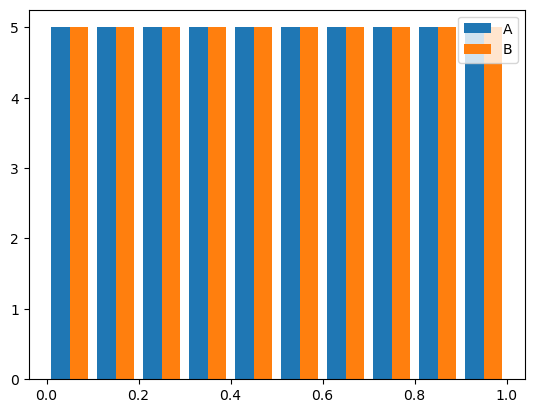

In [10]:
plt.hist(X_trans)

plt.legend(['A', 'B'])

plt.show()

In [11]:
"""
    QuantileTransformer의 n_samples 기본값은 1000 (여기선 50으로 해서 50)
    quantiles_ 속성으로 확인 가능
    밑의 shape에서 2는 특성 종류 >>> 2차원
"""

scaler.quantiles_.shape

(50, 2)

In [12]:
"""
    np.percentile(data, pct)
    data에서주어진 pct 분위의 경계값에 해당하는 값을 반환
    
    ex. np.pcercentile(x, [10, 20, 30]) >>> x의 하위 10, 20, 30%의 경계값 반환
"""

x = np.array([[0], [5], [8], [9], [10]])

np.percentile(x[ : , 0], [0, 25, 50, 75, 100])

array([ 0.,  5.,  8.,  9., 10.])

In [13]:
x_trans = QuantileTransformer(n_quantiles=5).fit_transform(x)

np.percentile(x_trans[ : , 0], [0, 25, 50, 75, 100])

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

QuantileTransformer에서 output_distribution="normal"로 지정할 경우 균등분포가 아닌 정규분포로 변환

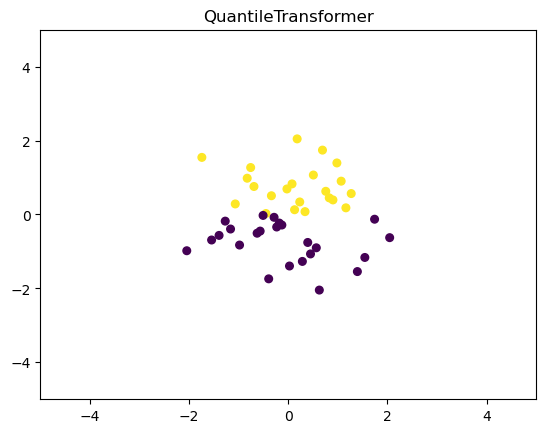

In [14]:
scaler = QuantileTransformer(output_distribution="normal", n_quantiles=50)
X_trans = scaler.fit_transform(X)

plt.scatter(X_trans[ : , 0], X_trans[ : , 1], c=y, s=30)
plt.axis([-5, 5, -5, 5])
plt.title(type(scaler).__name__)

plt.show()

#### PowerTransformer

데이터의 특성 별로 정규분포 형태에 가깝게 변환  
이 때, method로 변환 알고리즘 지정 가능 >>> { "yeo-johnson", "box-cox" }

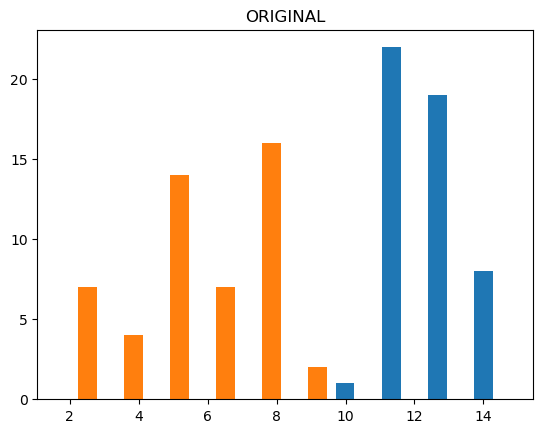

In [15]:
plt.hist(X)
plt.title("ORIGINAL")
plt.show()

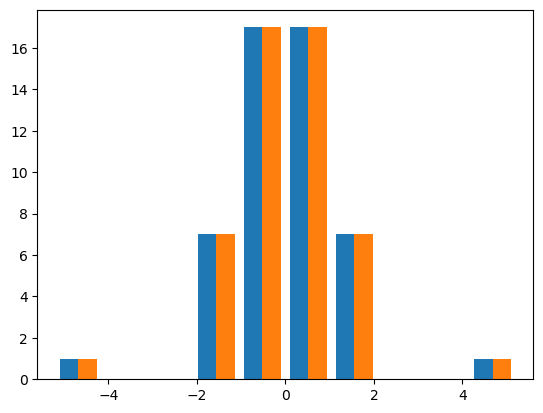

In [16]:
" QuantileTransformer로 정규분포에 가깝게 변환  "

X_trans = QuantileTransformer(output_distribution="normal", n_quantiles=50).fit_transform(X)
plt.hist(X_trans)
plt.show()

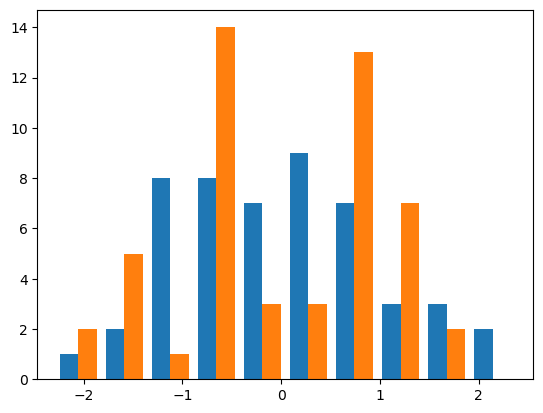

In [17]:
" StandardScaler로 표준정규분포에 가깝게 변환 "

X_trans = StandardScaler().fit_transform(X)
plt.hist(X_trans)
plt.show()

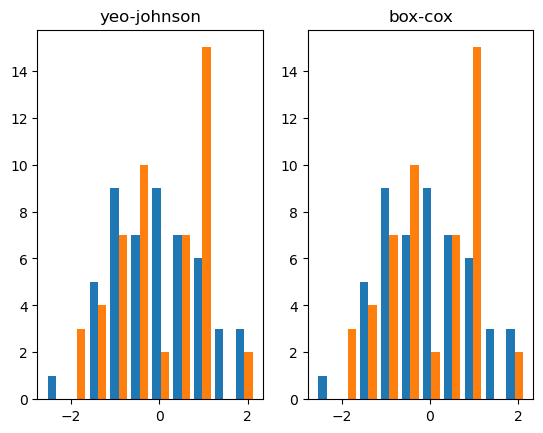

In [18]:
" PowerTransformer: yeo-johnson VS box-cox"

X_trans1 = PowerTransformer(method="yeo-johnson").fit_transform(X)
X_trans2 = PowerTransformer(method="box-cox").fit_transform(X)

fig, ax = plt.subplots(1, 2)

ax[0].hist(X_trans1)
ax[0].set_title("yeo-johnson")

ax[1].hist(X_trans2)
ax[1].set_title("box-cox")

plt.show()

### 전처리 효과 비교: SVC

In [19]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

svm = SVC(gamma="auto")

svm.fit(X_train, y_train)

SVC(gamma='auto')

In [20]:
svm.score(X_test, y_test)

0.6293706293706294

In [21]:
scaler = MinMaxScaler()

scaler.fit(cancer.data)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_scaled = SVC(gamma="auto")

svm_scaled.fit(X_train_scaled, y_train)

SVC(gamma='auto')

In [22]:
svm_scaled.score(X_test_scaled, y_test)

0.958041958041958

# 차원축소, 특성 추출, 매니폴드 학습

### 주성분 분석

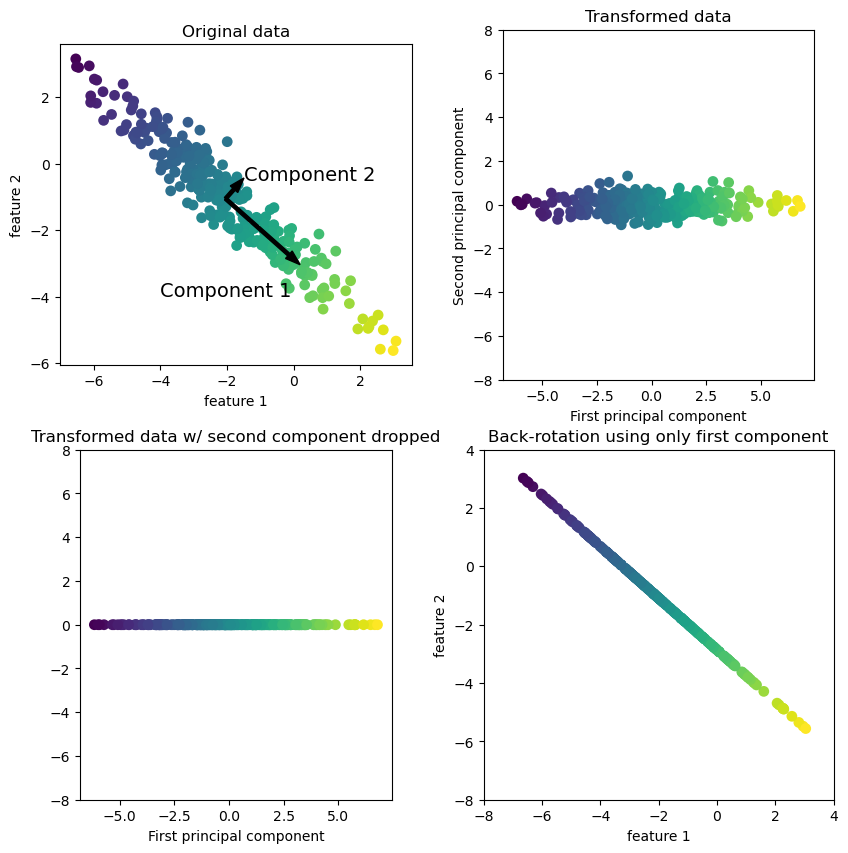

In [23]:
mglearn.plots.plot_pca_illustration()

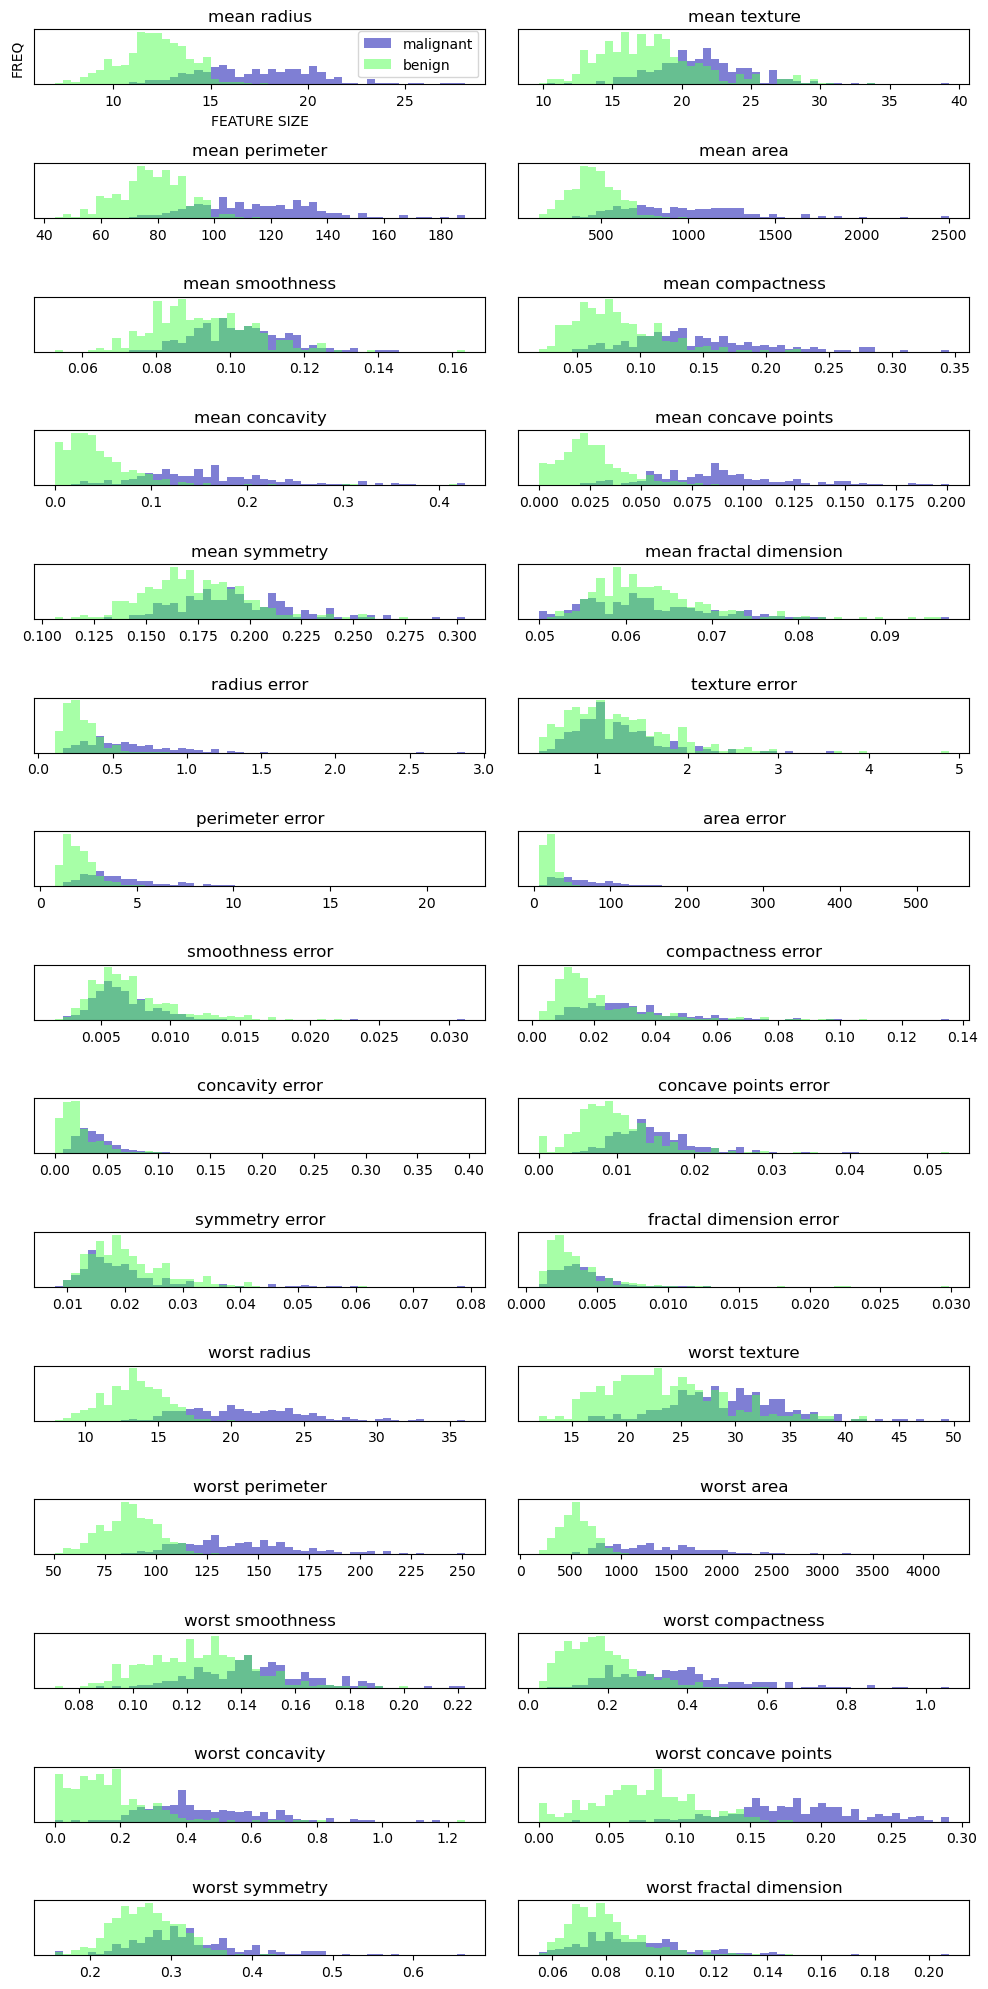

In [24]:
"""
    특성 간 상관관계 분석 전
    각 특성들의 클래스 별 분포 파악
    
    결과
        1. mean smoothness, smoothness error와 같이 악성, 양성이 서로 많이 겹치는 특성은 사용하기 힘듦
        2. worst concave points와 같이 악성, 양성에 따른 분포가 구분되는 특성은 유용할 것
"""

fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _ , bins = np.histogram(cancer.data[ : , i], bins = 50)
    ax[i].hist(malignant[ : , i], bins=bins, color=mglearn.cm3(0), alpha=0.5)
    ax[i].hist(benign[ : , i], bins=bins, color=mglearn.cm3(2), alpha=0.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
    
ax[0].set_xlabel("FEATURE SIZE")
ax[0].set_ylabel("FREQ")
ax[0].legend(["malignant", "benign"], loc="best")

fig.tight_layout()

In [25]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

scaler = StandardScaler()
scaler.fit(cancer.data)

X_scaled = scaler.transform(cancer.data)

In [26]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X_scaled)

PCA(n_components=2)

In [27]:
X_pca = pca.transform(X_scaled)

In [28]:
X_scaled.shape, X_pca.shape

((569, 30), (569, 2))

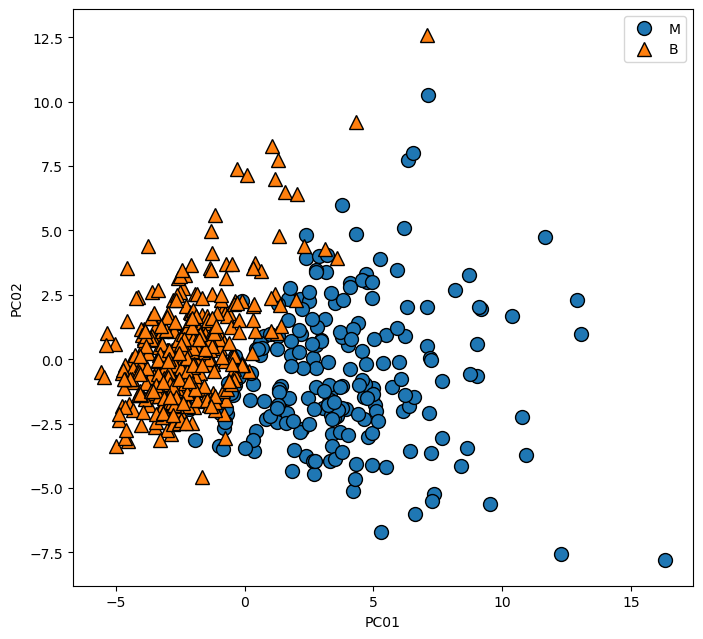

In [29]:
plt.figure(figsize=(8, 8))

mglearn.discrete_scatter(X_pca[ : , 0], X_pca[ : , 1], cancer.target)

plt.legend(["M", "B"], loc="best")
plt.gca().set_aspect("equal")

plt.xlabel("PC01")
plt.ylabel("PC02")

plt.show()

PCA는 비지도 학습이므로 회전축을 찾을 때 어떤 클래스 정보도 사용하지 않는다 <br>
데이터에 있는 상관관계만 고려한다

In [30]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

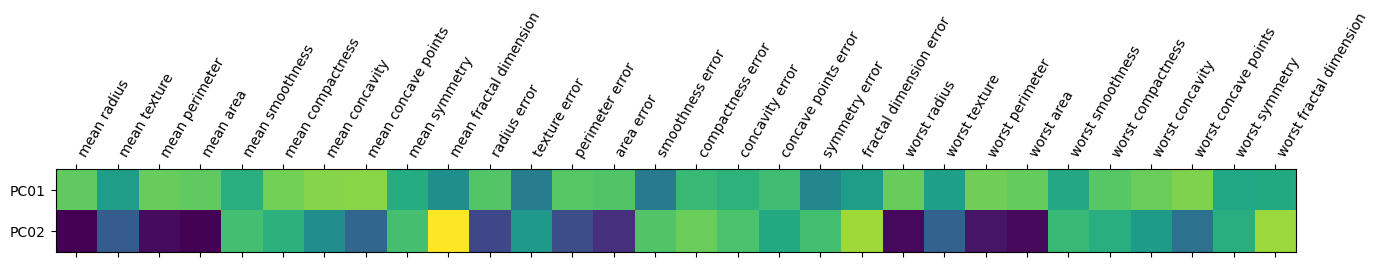

In [31]:
plt.matshow(pca.components_, cmap="viridis")
plt.yticks([0, 1], ["PC01", "PC02"])
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=60, ha="left")

plt.show()

PCA를 이용한 이미지 특성 추출  
<br>
PCA는 특성 추출에도 이용할 수 있다

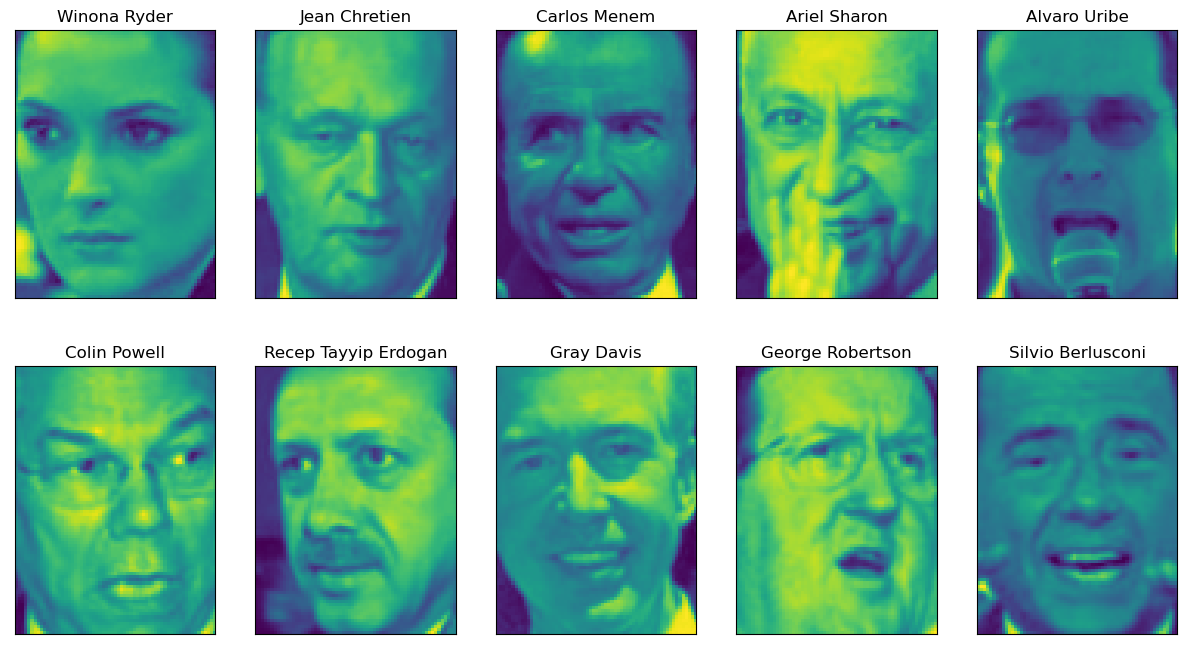

In [32]:
from sklearn.datasets import fetch_lfw_people

people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={"xticks": (), "yticks": ()})

for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [33]:
counts = np.bincount(people.target)

for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:30} {1:3}".format(name, count), end="   ")
    if (i + 1) % 3 == 0: 
        print()

Alejandro Toledo                39   Alvaro Uribe                    35   Amelie Mauresmo                 21   
Andre Agassi                    36   Angelina Jolie                  20   Ariel Sharon                    77   
Arnold Schwarzenegger           42   Atal Bihari Vajpayee            24   Bill Clinton                    29   
Carlos Menem                    21   Colin Powell                   236   David Beckham                   31   
Donald Rumsfeld                121   George Robertson                22   George W Bush                  530   
Gerhard Schroeder              109   Gloria Macapagal Arroyo         44   Gray Davis                      26   
Guillermo Coria                 30   Hamid Karzai                    22   Hans Blix                       39   
Hugo Chavez                     71   Igor Ivanov                     20   Jack Straw                      28   
Jacques Chirac                  52   Jean Chretien                   55   Jennifer Aniston              

In [34]:
mask = np.zeros(people.target.shape, dtype=bool)

for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][ : 50]] = 1
    
X_people = people.data[mask]
y_people = people.target[mask]

X_people = X_people / 255

In [35]:
X_people

array([[0.22352941, 0.23660131, 0.30588236, ..., 0.06797386, 0.06535947,
        0.08888888],
       [0.2614379 , 0.31633985, 0.3477124 , ..., 0.03398693, 0.03267974,
        0.03660131],
       [0.07320261, 0.05620915, 0.05882353, ..., 0.08888888, 0.08888888,
        0.10065359],
       ...,
       [0.14248365, 0.0875817 , 0.10980392, ..., 0.05620915, 0.02614379,
        0.02091503],
       [0.21176471, 0.25620916, 0.22091503, ..., 0.82222223, 0.8235294 ,
        0.8326797 ],
       [0.43398693, 0.50326794, 0.5699346 , ..., 0.05490196, 0.05490196,
        0.05359477]], dtype=float32)

In [36]:
X_people[ : , 0].shape

(2063,)

In [37]:
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [38]:
knn.score(X_test, y_test)

C:\Users\rksla\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.23255813953488372

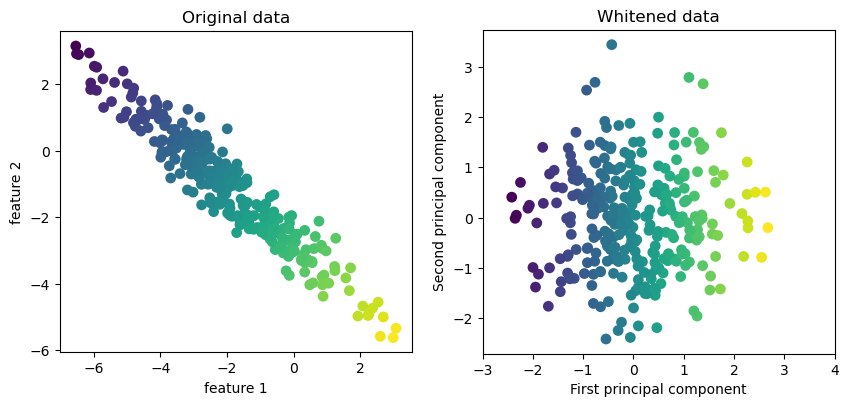

In [39]:
mglearn.plots.plot_pca_whitening()

In [40]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

X_train_pca.shape

(1547, 100)

In [41]:
pca.components_.shape

(100, 5655)

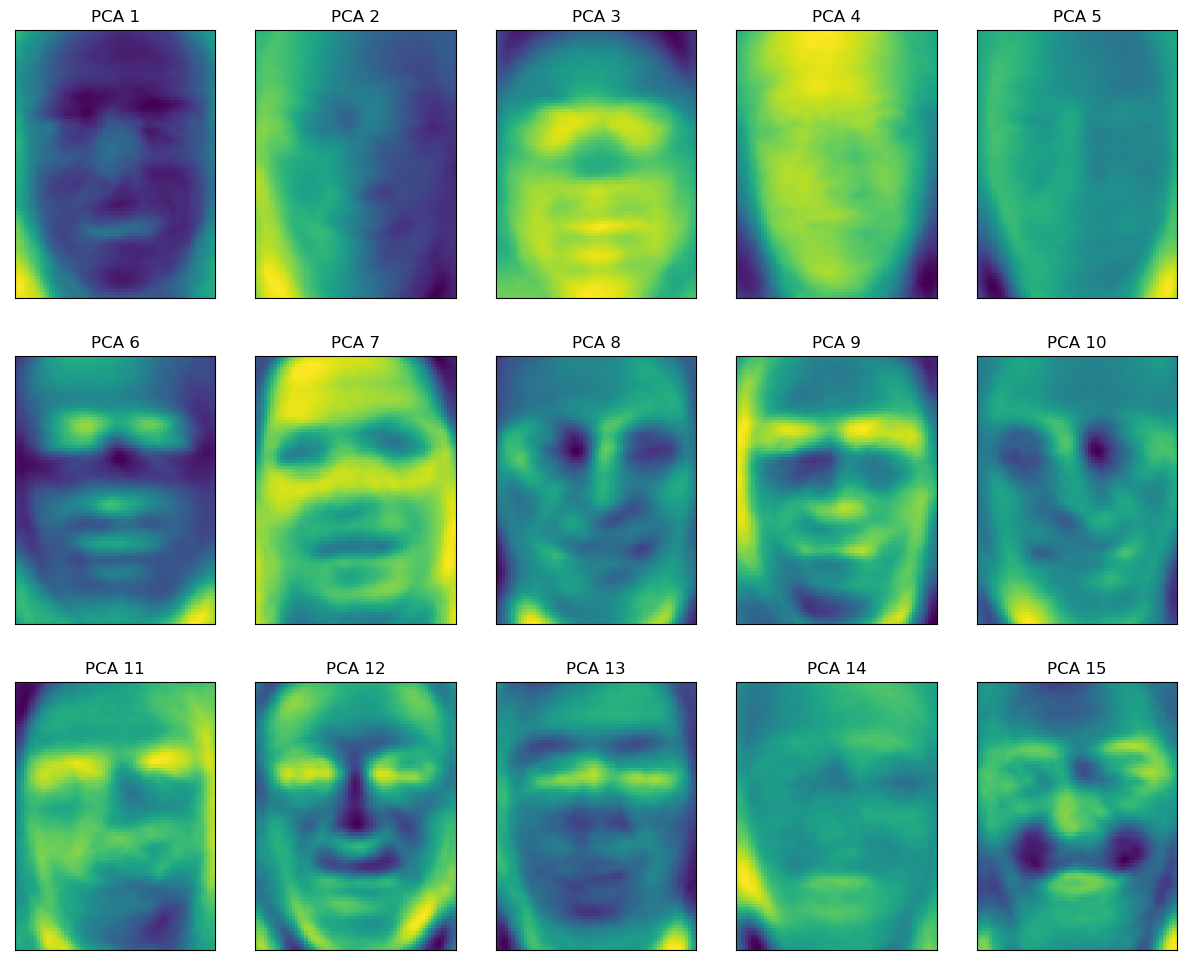

In [42]:
fig, axes = plt.subplots(3, 5, figsize=(15, 12), subplot_kw={"xticks": (), "yticks": ()})

for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap="viridis")
    ax.set_title("PCA {}".format(i+1))

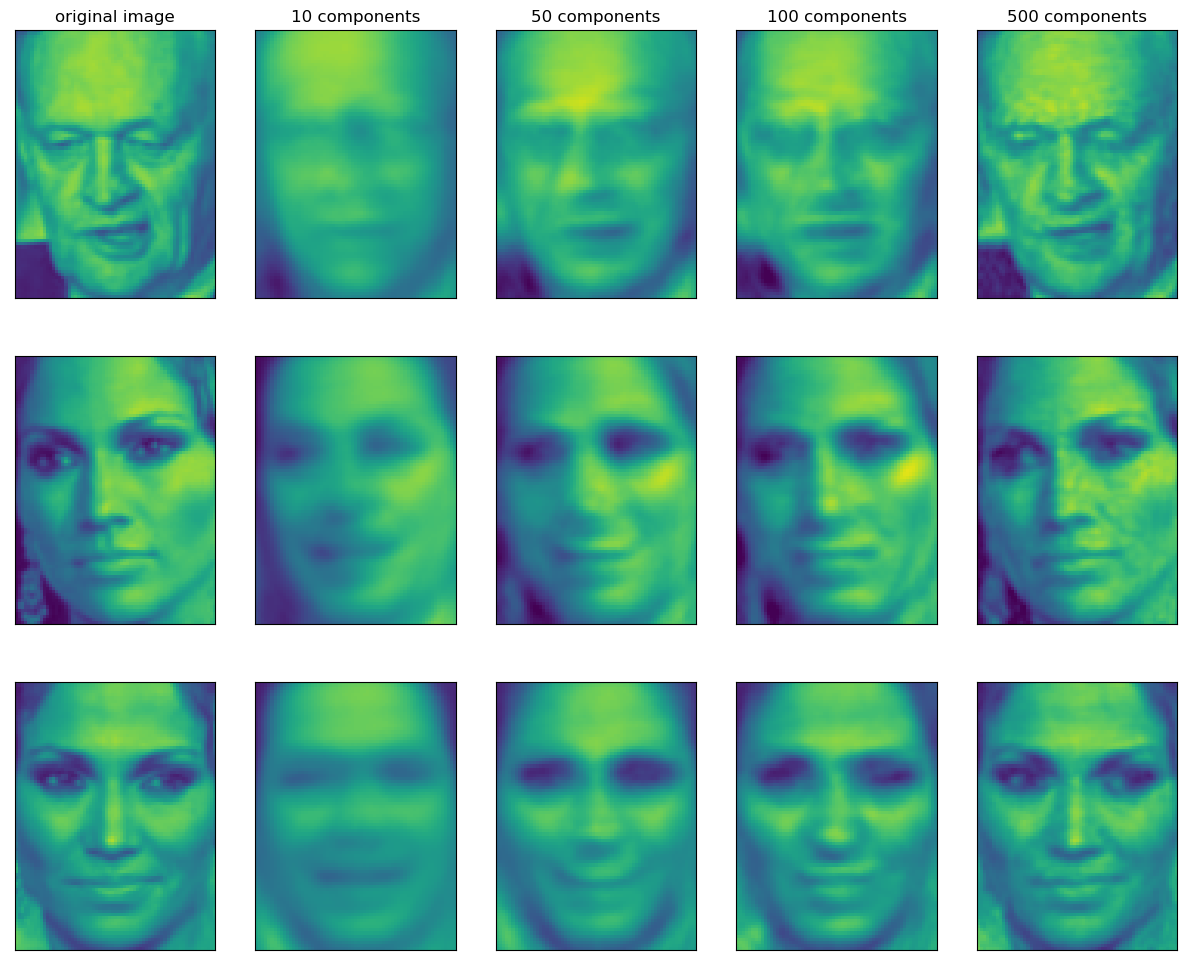

In [43]:
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)

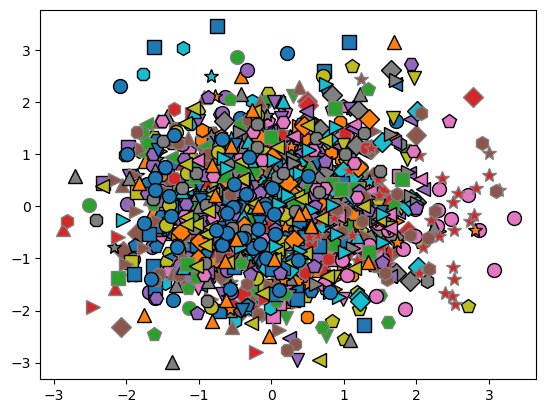

In [44]:
mglearn.discrete_scatter(X_train_pca[ : , 0], X_train_pca[ : , 1], y_train)

plt.show()

In [45]:
np.sum(pca.explained_variance_ratio_)

0.90277493

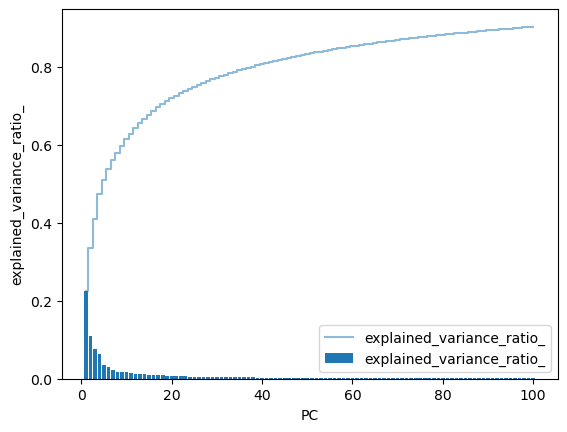

In [46]:
plt.bar(
    range(1, 101), pca.explained_variance_ratio_, 
    align="center", label="explained_variance_ratio_"
)
plt.step(
    range(1, 101), np.cumsum(pca.explained_variance_ratio_), 
    alpha=0.5, where="mid", label="explained_variance_ratio_"
)

plt.ylabel("explained_variance_ratio_")
plt.xlabel("PC")
plt.legend()

plt.show()

In [47]:
pca = PCA(n_components=40, whiten=True, random_state=0).fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

knn.fit(X_train_pca, y_train)

knn.score(X_test_pca, y_test)

C:\Users\rksla\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.31589147286821706

In [48]:
pca = PCA(n_components=0.8, whiten=True, random_state=0).fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

knn.fit(X_train_pca, y_train)

knn.score(X_test_pca, y_test), pca.n_components_

C:\Users\rksla\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


(0.29844961240310075, 38)

### 비음수 행렬 분해 (NMF: Non-negative Matrix Factorization)

PCA와 마찬가지로 원본 행렬을 특정 행렬 곱으로 분해하는 기법 <br>
PCA와의 차이<br>
&nbsp;PCA: 데이터의 분산이 가장 크고 수직인 성분을 찾는다<br>
&nbsp;NMF: 음수가 아닌 성분과 계수를 찾아낸다 <br>
&nbsp;    >>> 주성분과 계수 모두 0보다 크거나 같다<br>
&nbsp;    >>> 음수가 아닌 특성을 가진 데이터에만 적용할 수 있다 (음성, 텍스트, 이미지 ...)<br>
&nbsp;    >>> 데이터가 원점에서 상대적으로 어디에 놓여있는지 중요하다


NMF >>> V = W dot H <br>
V: 원본 (크기: 샘플 수 * 특성 수) <br>
W: 가중치 행렬 (크기: 샘플 수 * 주성분 수) <br>
H: 특성 행렬 (크기: 주성분 수 * 특성 수)

성분 수가 원본 특성 수만큼 많다면 알고리즘은 데이터의 각 특성의 끝에 위치한 포인트를 가리키는 방향을 선택할 것이다<br>
하나의 성분만 사용한다면 알고리즘은 데이터를 가장 잘 표현할 수 있는 평균으로 향하는 성분을 만들 것이다 <br>
PCA와는 반대로 성분 개수를 줄이면 특정 방향이 제거될 뿐만 아니라 전체 성분이 완전히 바뀐다<br>
NMF에서 성분은 특정 방식으로 정렬되어 있지도 않기 때문에 모든 성분을 동등하게 취급한다 <br>
NMF는 무작위로 초기화하기 때문에 초기값에 따라 결과가 달라질 수 있다. 이 차이는 복잡한 데이터일수록 커진다

C:\Users\rksla\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
C:\Users\rksla\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
C:\Users\rksla\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
C:\Users\rksla\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


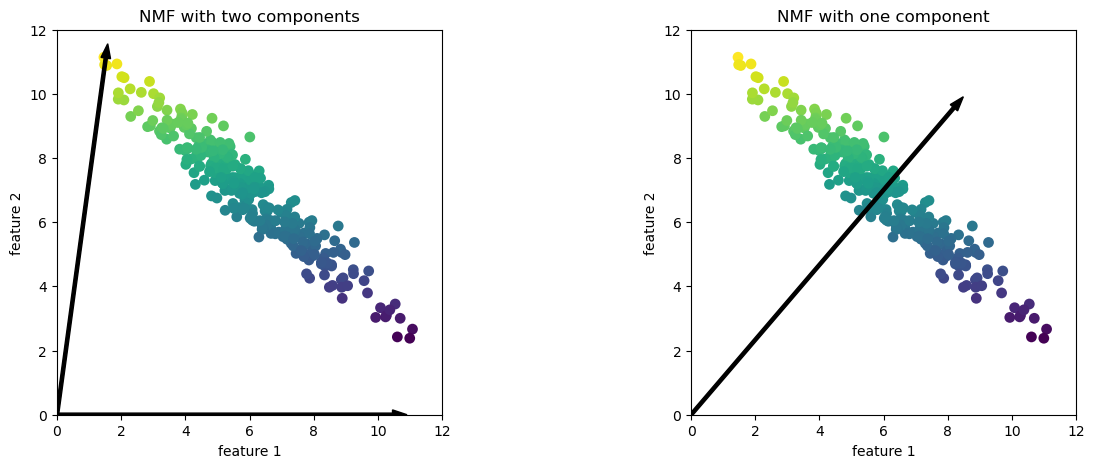

In [49]:
mglearn.plots.plot_nmf_illustration()

In [50]:
mglearn.plots.plot_nmf_faces(X_train, X_test[ : 3], image_shape)

________________________________________________________________________________
[Memory] Calling mglearn.plot_nmf.nmf_faces...
nmf_faces(array([[0.535948, ..., 0.243137],
       ...,
       [0.043137, ..., 0.596078]], dtype=float32), 
array([[0.237908, ..., 0.269281],
       ...,
       [0.117647, ..., 0.613072]], dtype=float32))


C:\Users\rksla\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
C:\Users\rksla\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
C:\Users\rksla\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
C:\Users\rksla\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
C:\Users\rksla\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.

KeyboardInterrupt: 

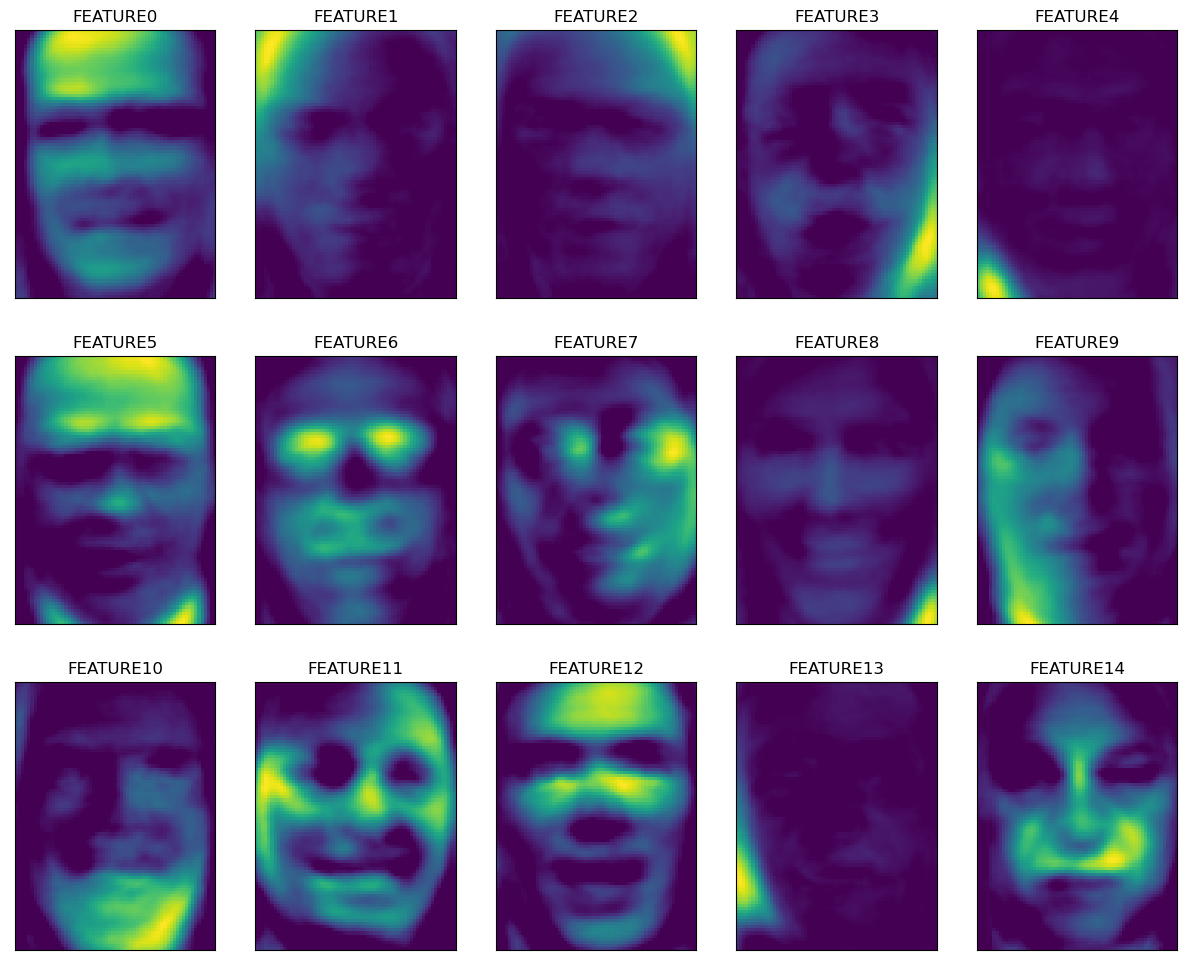

In [51]:
from sklearn.decomposition import NMF

nmf = NMF(n_components=15, init="nndsvd", random_state=0, max_iter=1000, tol=1e-2)
nmf.fit(X_train)

X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

fig, axes = plt.subplots(3, 5, figsize=(15, 12), subplot_kw={"xticks":(), "yticks": ()})

for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("FEATURE{}".format(i))

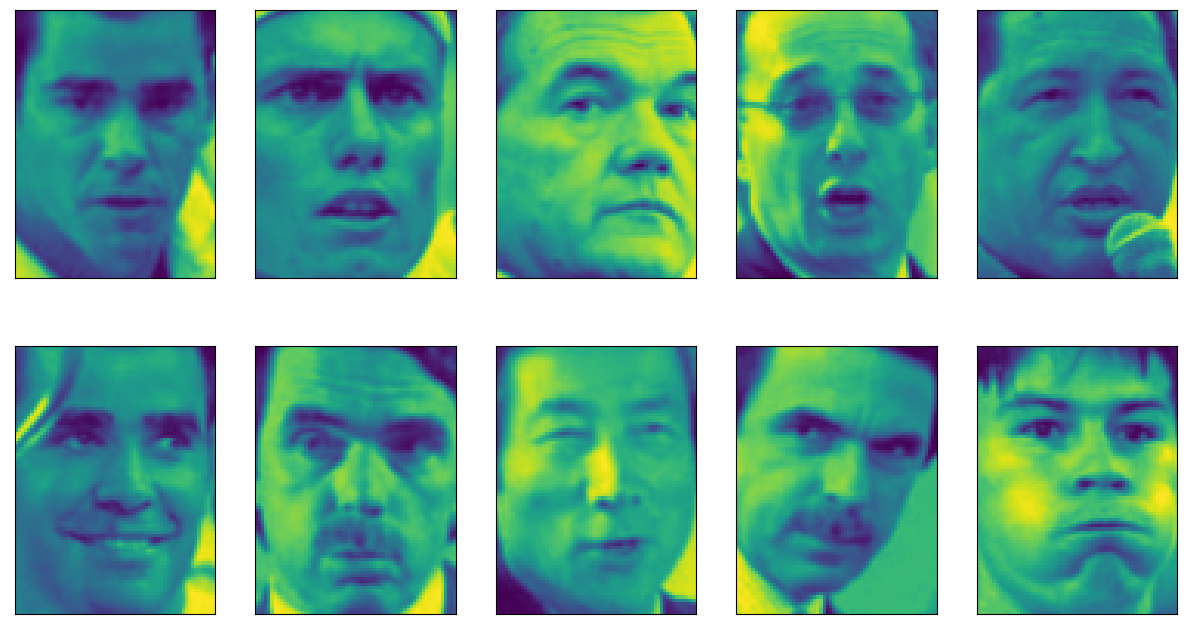

In [52]:
compn = 3

inds = np.argsort(X_train_nmf[ : , compn])[ : : -1]
fig, axes=  plt.subplots(2, 5, figsize=(15, 8), subplot_kw={"xticks": (), "yticks": ()})

for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

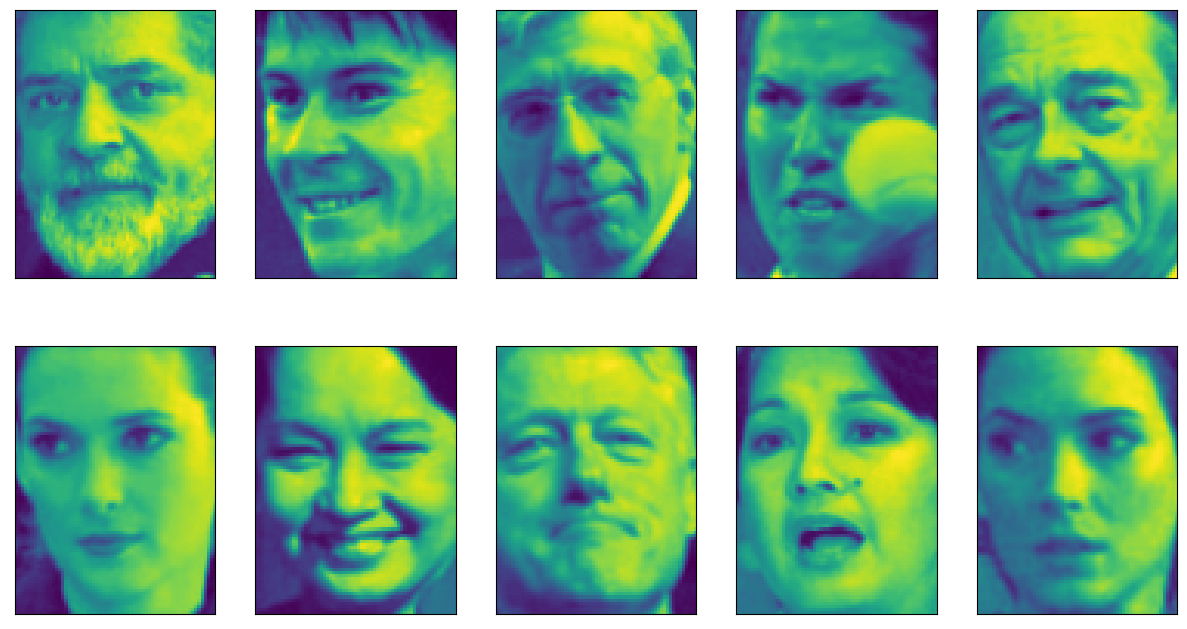

In [54]:
compn = 7

inds = np.argsort(X_train_nmf[ : , compn])[ : : -1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={"xticks": (), "yticks": ()})

for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

Text(0, 0.5, 'Signal')

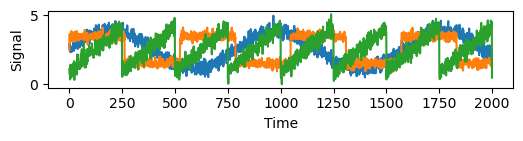

In [56]:
S = mglearn.datasets.make_signals()

plt.figure(figsize=(6, 1))
plt.plot(S, '-')
plt.xlabel("Time")
plt.ylabel("Signal")

In [57]:
A = np.random.RandomState(0).uniform(size=(100, 3))
X = np.dot(S, A.T)

In [61]:
print("MEASURED: ", X.shape)

MEASURED:  (2000, 100)


In [62]:
nmf = NMF(n_components=3, init="nndsvd", random_state=42, max_iter=1000, tol=1e-2)
S_ = nmf.fit_transform(X)

print("RESTORED:", S_.shape)

RESTORED: (2000, 3)


In [67]:
S_[ : 10]

array([[0.63491696, 0.491709  , 0.10127117],
       [0.68359403, 0.74641323, 0.02275894],
       [0.6858953 , 0.79991448, 0.00707353],
       [0.62733275, 0.74541141, 0.02673434],
       [0.56367365, 0.67901235, 0.        ],
       [0.58343282, 0.70931048, 0.11192799],
       [0.58857729, 0.66817694, 0.2104185 ],
       [0.5672805 , 0.7857064 , 0.        ],
       [0.56567795, 0.79137066, 0.00538257],
       [0.6397085 , 0.72969348, 0.05775055]])

In [69]:
(S_ < 0).sum()

0

In [63]:
pca = PCA(n_components=3)
H = pca.fit_transform(X)
H.shape

(2000, 3)

In [70]:
H[ : 10]

array([[ 8.38970181, -2.48056595,  2.09452508],
       [ 3.39519331, -5.11954381,  2.28058601],
       [ 2.59987718, -5.69010095,  2.25930571],
       [ 5.25005969, -5.23349679,  1.87021938],
       [ 9.2908639 , -5.32545648,  2.55012035],
       [ 5.788862  , -4.60962469,  0.95770197],
       [ 4.50033849, -3.75316747,  0.27777786],
       [ 7.07212507, -6.04808245,  1.8097791 ],
       [ 6.88149534, -5.92048872,  1.49053524],
       [ 4.53135361, -4.91065104,  1.73750136]])

In [71]:
(H < 0).sum()

2865

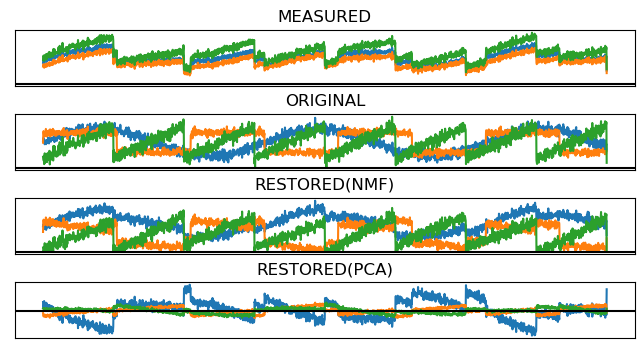

In [78]:
models = [X, S, S_, H]
names = [
    "MEASURED",
    "ORIGINAL",
    "RESTORED(NMF)",
    "RESTORED(PCA)"
]

fig, axes = plt.subplots(4, figsize=(8, 4), gridspec_kw={"hspace": 0.5}, subplot_kw={"xticks": (), "yticks": ()})

for model, name, ax in zip(models, names, axes):
    ax.set_title(name)
    ax.plot(model[ : , : 3])
    ax.axhline(0, color="#000000")